<a href="https://colab.research.google.com/github/nicodes/quant-algos/blob/main/simple-moving-avg/sma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

File ‘SPY.csv’ already there; not retrieving.



In [37]:
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [38]:
# calc log return and shift by -1
df['LogReturn'] = np.log(df['Close']).diff()
df['LogReturn'] = df['LogReturn'].shift(-1)

# calc SMAs
df['SlowSMA'] = df['Close'].rolling(30).mean()
df['FastSMA'] = df['Close'].rolling(10).mean()

df['Signal'] = np.where(df['SlowSMA'] <= df['FastSMA'], 1, 0)
df['PrevSignal'] = df['Signal'].shift(1)

df['Buy'] = (df['PrevSignal'] == 0) & (df['Signal'] == 1)
df['Sell'] = (df['PrevSignal'] == 1) & (df['Signal'] == 0)

df.iloc[80:].head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn,SlowSMA,FastSMA,Signal,PrevSignal,Buy,Sell
Date,,,,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1,1.0,False,False
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1,1.0,False,False
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1,1.0,False,False
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1,1.0,False,False
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1,1.0,False,False


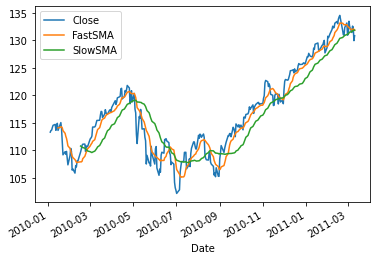

In [39]:
# plot first 300 points
df.iloc[:300][['Close', 'FastSMA', 'SlowSMA']].plot()

In [40]:
# add IsInvested col

is_invested = False
def assign_is_invested(row):
  global is_invested
  if is_invested and row['Sell']:
    is_invested = False
  if not is_invested and row['Buy']:
    is_invested = True
  
  # otherwise, just remain
  return is_invested

df['IsInvested'] = df.apply(assign_is_invested, axis=1)
df.iloc[80:].head()

,Open,High,Low,Close,Adj Close,Volume,LogReturn,SlowSMA,FastSMA,Signal,PrevSignal,Buy,Sell,IsInvested
Date,,,,,,,,,,,,,,
2010-04-29,120.099998,121.110001,120.070000,120.860001,98.780228,193775000,-0.017107,118.891334,120.360999,1,1.0,False,False,True
2010-04-30,120.879997,121.010002,118.779999,118.809998,97.104759,270000900,0.012879,118.950333,120.305999,1,1.0,False,False,True
2010-05-03,119.379997,120.680000,119.199997,120.349998,98.363426,182747900,-0.023796,119.096333,120.359999,1,1.0,False,False,True
2010-05-04,119.010002,119.029999,116.919998,117.519997,96.050430,360353400,-0.005974,119.127333,120.023999,1,1.0,False,False,True
2010-05-05,116.559998,117.800003,115.970001,116.820000,95.478325,328973200,-0.033778,119.107667,119.639999,1,1.0,False,False,True


In [55]:
# algo results
df['AlgoLogReturn'] = df['IsInvested'] * df['LogReturn']
print('--- algo results ---')
print('return: ' + str(df["AlgoLogReturn"].sum()))
print('std dev: ' + str(df['AlgoLogReturn'].std()))
print('sharpe: ' + str(df['AlgoLogReturn'].mean() / df['AlgoLogReturn'].std()))

return: 0.5234843769065618
std dev: 0.006352163765675765
sharpe: 0.036432538977064756


In [56]:
# buy and hold results
print('--- buy and hold results ---')
print('return: ' + str(df["LogReturn"].sum()))
print('std dev: ' + str(df['LogReturn'].std()))
print('sharpe: ' + str(df['LogReturn'].mean() / df['LogReturn'].std()))

return: 0.7821162403084001
std dev: 0.009446971193167578
sharpe: 0.03660042364089666
